In [ ]:
# --- Celda 1: Instalación ---
!pip install osmnx networkx matplotlib

In [ ]:
# --- Celda 2: Importación ---
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Configuramos osmnx para que funcione correctamente en notebooks
ox.settings.log_console=True
ox.settings.use_cache=True

In [ ]:
# --- Celda 3: Descarga del Grafo ---

# Define el lugar que quieres descargar. Puedes usar un nombre de barrio, ciudad o una dirección.
lugar = "Plaza Castilla, Madrid, Spain"

distancia_radio = 100000

# Esta función busca el punto central de "lugar" y descarga todas las calles
# dentro del radio (dist) que le hemos especificado.

print(f"Descargando el grafo de calles para un radio de {distancia_radio}m alrededor de: {lugar}...")
G = ox.graph_from_address(lugar, dist=distancia_radio, network_type='drive')

print("¡Grafo creado con éxito!")

Descargando el grafo de calles para un radio de 100000m alrededor de: Plaza Castilla, Madrid, Spain...


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3140994737.py", line 12, in <cell line: 0>
    G = ox.graph_from_address(lugar, dist=distancia_radio, network_type='drive')
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/osmnx/graph.py", line 295, in graph_from_address
    G = graph_from_point(
        ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/osmnx/graph.py", line 200, in graph_from_point
    G = graph_from_bbox(
        ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/osmnx/graph.py", line 105, in graph_from_bbox
    G = graph_from_polygon(
        ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/osmnx/graph.py", line 495, in graph_from_polygon
    G_buff = _create_graph(respo

TypeError: object of type 'NoneType' has no len()

Mostrando el mapa de calles (grafo) de Malasaña.


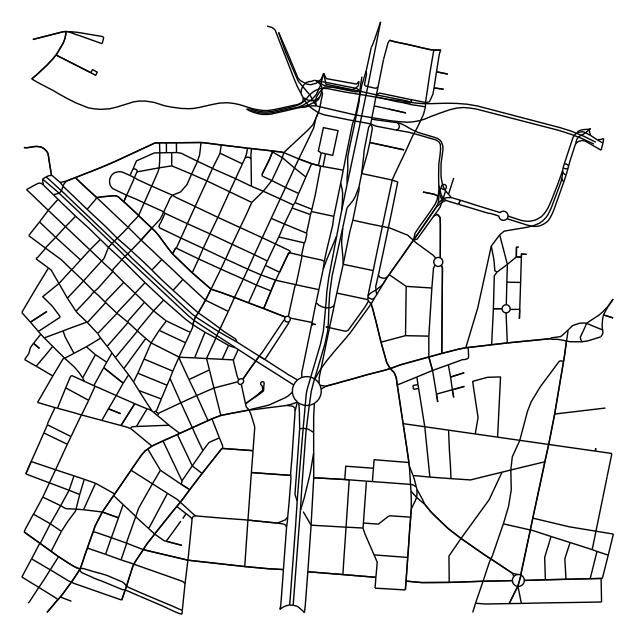

In [ ]:
# --- Celda 4: Visualización Básica ---

# Dibuja el grafo.

fig, ax = ox.plot_graph(G, show=False, close=False, bgcolor='#FFFFFF', edge_color='k', node_size=0)
print("Mostrando el mapa de calles (grafo) de Malasaña.")
plt.show()

Calculando la ruta más corta con Dijkstra...
¡Ruta encontrada!


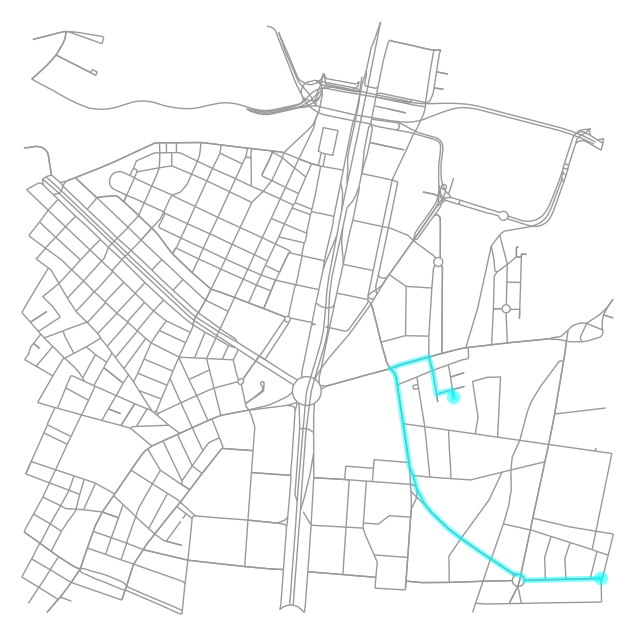

Mostrando la ruta óptima calculada.


In [ ]:
# --- Celda 5: Cálculo de Ruta con Dijkstra ---

# NetworkX necesita un nodo de inicio y un nodo final.
# Vamos a coger dos nodos aleatorios del grafo para este ejemplo. -> En el futuro habría que definirlos
import random
nodos = list(G.nodes)
origen = random.choice(nodos)
destino = random.choice(nodos)

# 'weight'='length' le dice a Dijkstra que encuentre la ruta con la menor DISTANCIA.
print("Calculando la ruta más corta con Dijkstra...")
ruta = nx.dijkstra_path(G, origen, destino, weight='length')

print("¡Ruta encontrada!")

# Visualiza el grafo y la ruta que ha calculado Dijkstra
fig, ax = ox.plot_graph_route(G, ruta, route_color='cyan', route_linewidth=4,
                              orig_dest_size=100, ax=None, node_size=0,
                              edge_color='#999999', edge_linewidth=1,
                              bgcolor='#FFFFFF')

print("Mostrando la ruta óptima calculada.")
plt.show()